In [2]:
# from astropy.visualization import astropy_mpl_style
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import glob
import subprocess as s
warnings.filterwarnings("ignore")

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
# plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
kernel = Gaussian2DKernel(x_stddev=2)

from matplotlib.patches import Circle, Arc



In [3]:
import matplotlib.pyplot as plt

def basic_figure_style():
    SMALL_SIZE = 8 * 2
    MEDIUM_SIZE = 10 * 2
    BIGGER_SIZE = 20 * 2

    plt.rc("font", size=SMALL_SIZE, family="serif")  # controls default text sizes
    plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
    plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SMALL_SIZE, direction="out")  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SMALL_SIZE, direction="out")  # fontsize of the tick labels
    plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
    plt.rc("figure", titlesize=SMALL_SIZE)  # fontsize of the figure title
    plt.rc("lines", linewidth=2)
    plt.rc("axes", grid=True)  #
    plt.rc("grid", alpha=0.7)  #
    plt.rc("xtick", top=True)
    plt.rc("ytick", right=True)
    plt.rc("axes.formatter", use_mathtext=True, min_exponent=4, useoffset=False)
basic_figure_style()

In [ ]:
# spectrum regions


# sb profile regions



(192, 192)
5.3522024699437895e-08 3.848067066228376e-06


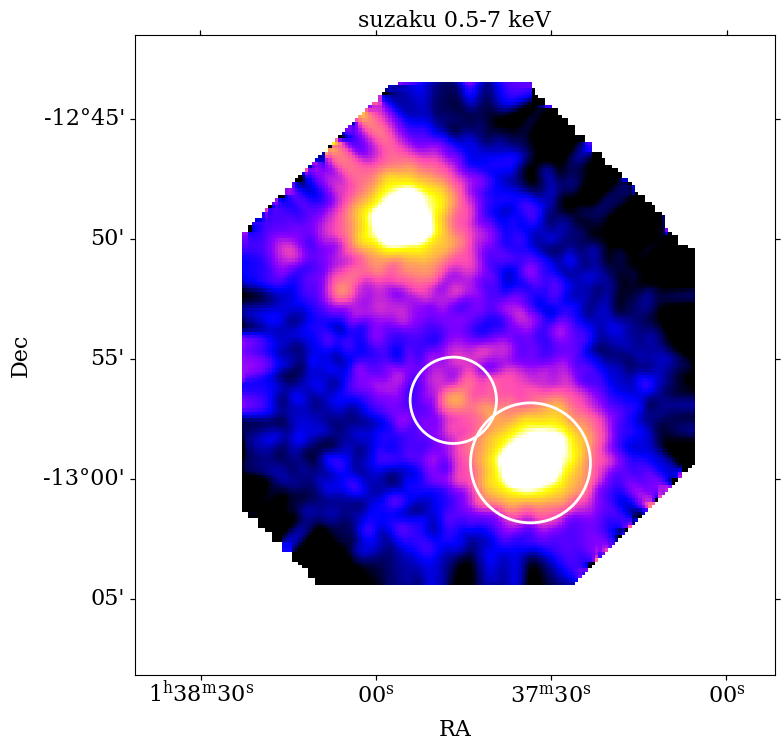

(367, 339)
7.52341375752698e-09 1.779894444028387e-06


<Figure size 640x480 with 0 Axes>

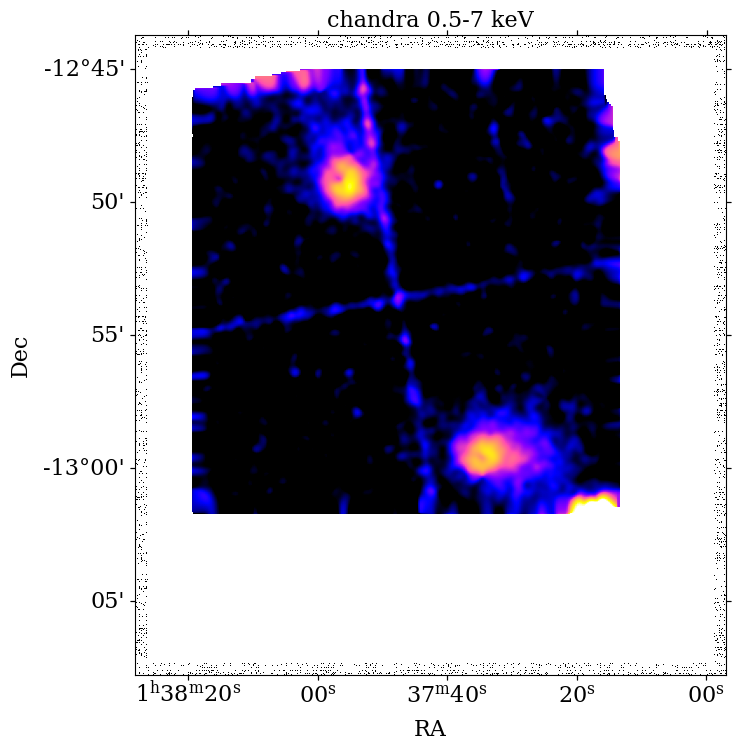

(714, 666)
1.1906928356880324e-10 0.0008201427178961061


<Figure size 640x480 with 0 Axes>

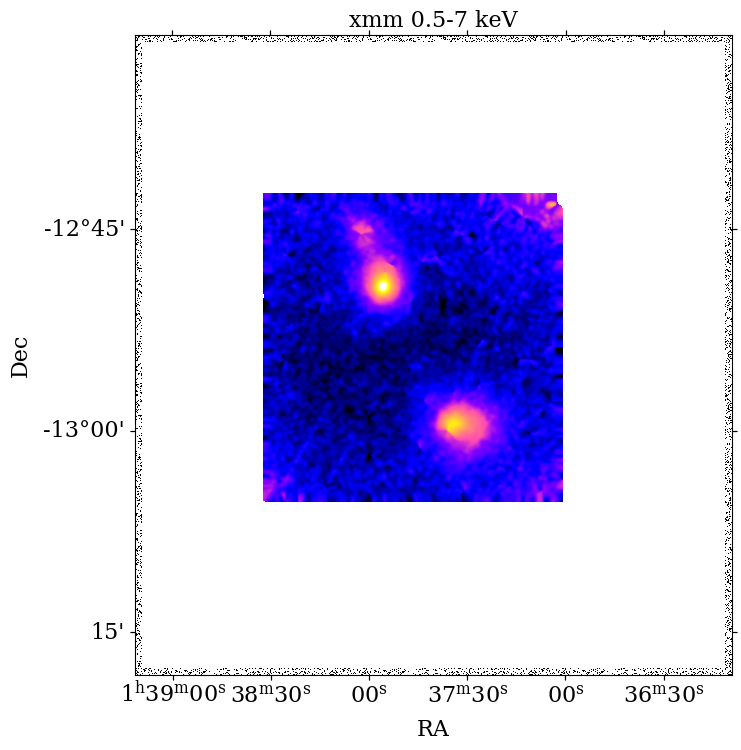

<Figure size 640x480 with 0 Axes>

In [9]:
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302'
os.chdir(workpath)
# only exclude point sources flux>= 5e-15
#chandra/merged_clean_evt.fits_4967_broad_thresh_exsrc_ctr.fits


files = [f'{workpath}/suzaku/xis1_07_7_subnxb_ctr.fits', f'{workpath}/chandra/images/0.5-7_band1_net_ctr_exsrc_4bin.fits', f'{workpath}/xmm/0.5-7/EPIC_net_ctr_exsrc.fits']
filter = [[35,170,40,160],[100,340,40,270],[200,530,150,470]]#suzaku 
vrange = [[1e-7, 1e-6], [1e-7, 1e-6], [1e-5, 5e-4],]
eband = ['0.5-7', '0.5-7', '0.5-7']
names = ['suzaku', 'chandra','xmm']
for i, file in enumerate(files):
    hdu = fits.open(f'{file}')[0]
    image_data = hdu.data
    print(image_data.shape)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=WCS(f'{file}'))

    ra = ax.coords[0]
    dec = ax.coords[1]
    plt.grid('off')
    ax.set_title(f'{names[i]} {eband[i]} keV')
    ra.set_axislabel('RA')
    dec.set_axislabel('Dec')
    # image_data = np.where(image_data<=0, np.nan, image_data)
    msk = np.zeros(image_data.shape)
    msk[filter[i][0]: filter[i][1], filter[i][2]: filter[i][3]] = 1
    image_data = image_data * msk
    image_data = np.where(np.isfinite(np.log10(image_data)), image_data, np.nan)
    print(np.nanmin(image_data), np.nanmax(image_data))
    astropy_conv = convolve(image_data, kernel)
    # astropy_conv = convolve(image_data[filter[i][0]:filter[i][1],filter[i][2]:filter[i][3]], kernel)
    # ax.imshow(astropy_conv, cmap='gnuplot2', norm = colors.LogNorm(vmin = vrange[i][0], vmax = vrange[i][1]), origin='lower')
    ax.imshow(astropy_conv, cmap='gnuplot2', norm = colors.LogNorm(vmin = vrange[i][0], vmax = vrange[i][1]), origin='lower')

    if names[i] =='suzaku':
        # read spectrum annuluses and the excluded sources in image coordinates
        import pyregion
        f = open(f'{workpath}/suzaku/annu_all_tst1.reg')
        reg = f.read()
        r2 = pyregion.parse(reg).as_imagecoord(hdu.header)
        patch_list, artist_list = r2.get_mpl_patches_texts()
        for p in patch_list:
            # p.set_color('white', fill=False)
            ax.add_patch(p)
        for t in artist_list:
            t.set_color('white')
            ax.add_artist(t)
    
        
    # plt.savefig(f'{workpath}/{file.split("/")[0]}_{eband[i]}.pdf', dpi=300)
    plt.show()
    plt.clf()
